In [27]:
# import the necessary packages
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
import numpy as np
import argparse
import imutils
import cv2
from google.colab.patches import cv2_imshow

In [2]:
def midpoint(A, B):
	return ((A[0] + B[0]) * 0.5, (A[1] + B[1]) * 0.5)

In [21]:
sample = cv2.imread('/content/try.png')
width = 0.863 # considering a Re.1 coin as object of known dimension

grayed_sample = cv2.cvtColor(sample, cv2.COLOR_BGR2GRAY)
grayed_sample = cv2.GaussianBlur(grayed_sample, (7, 7), 0)

edges = cv2.Canny(grayed_sample, 50, 100)
edges = cv2.dilate(edges, None, iterations=1)
edges = cv2.erode(edges, None, iterations=1)


cnts = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

(cnts, _) = sort_contours(cnts)
pixelsPerMetric = None

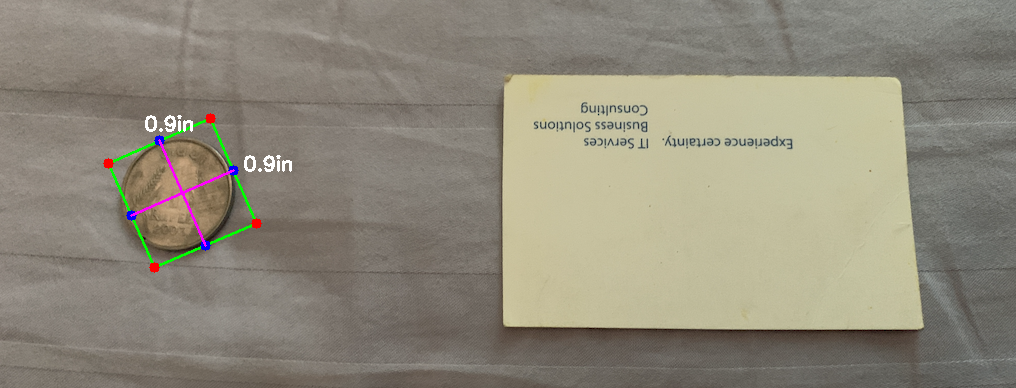

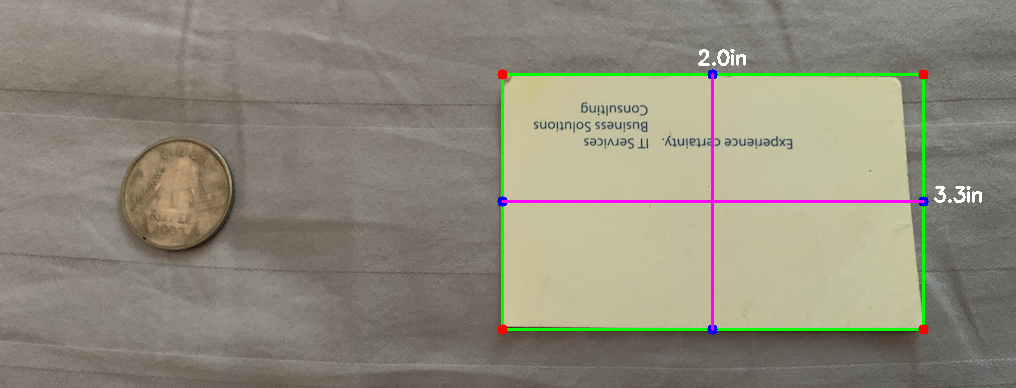

In [29]:
for contour in cnts:
  if cv2.contourArea(contour) < 100:
    continue
  orig = sample.copy()
  box = cv2.minAreaRect(contour)
  box = cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box)
  box = np.array(box, dtype = "int")
  box = perspective.order_points(box)
  cv2.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2)

  for (x,y) in box:
    cv2.circle(orig, (int(x), int(y)), 5, (0, 0, 255), -1)

  (tl, tr, br, bl) = box

  (tltrX, tltrY) = midpoint(tl, tr)
  (blbrX, blbrY) = midpoint(bl, br)
  (tlblX, tlblY) = midpoint(tl, bl)
  (trbrX, trbrY) = midpoint(tr, br)

  cv2.circle(orig, (int(tltrX), int(tltrY)), 5, (255, 0, 0), -1)
  cv2.circle(orig, (int(blbrX), int(blbrY)), 5, (255, 0, 0), -1)
  cv2.circle(orig, (int(tlblX), int(tlblY)), 5, (255, 0, 0), -1)
  cv2.circle(orig, (int(trbrX), int(trbrY)), 5, (255, 0, 0), -1)

  cv2.line(orig, (int(tltrX), int(tltrY)), (int(blbrX), int(blbrY)), (255, 0, 255), 2)
  cv2.line(orig, (int(tlblX), int(tlblY)), (int(trbrX), int(trbrY)), (255, 0, 255), 2)

  dA = dist.euclidean((tltrX, tltrY), (blbrX, blbrY))
  dB = dist.euclidean((tlblX, tlblY), (trbrX, trbrY))

  if pixelsPerMetric is None:
    pixelsPerMetric = dB / width
  dimA = dA / pixelsPerMetric
  dimB = dB / pixelsPerMetric
  cv2.putText(orig, "{:.1f}in".format(dimA),(int(tltrX - 15), int(tltrY - 10)), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (255, 255, 255), 2)
  cv2.putText(orig, "{:.1f}in".format(dimB), (int(trbrX + 10), int(trbrY)), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (255, 255, 255), 2)

  cv2_imshow(orig)
  cv2.waitKey(0)